# Fit Varshni dei picchi reference

In [107]:
from picchi import raccoglitore_1 # picchi reference
from varshni_subroutines import *

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=0', 'ass=1']
arr_temperatura = [15, 30, 45, 70, 100, 150]

### Estraggo i due picchi e il loro errore

In [108]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista dei picchi sx
# [1] - lista degli errori sui picchi sx
# [2] - lista dei picchi dx
# [3] - lista degli errori sui picchi dx

data = {}

In [109]:
for ass in d_o_ass:
    
    data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        data[ass][emi] = []
        arr_picchi_sx  = []
        arr_err_picchi_sx  = []
        arr_picchi_dx  = []
        arr_err_picchi_dx  = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            if len(raccoglitore_1[ass][emi][i]['Regione 1']) > 0:
                picco_sx = raccoglitore_1[ass][emi][i]['Regione 1'][0][0]
                err_picco_sx = raccoglitore_1[ass][emi][i]['Regione 1'][0][1]
                #print(i)
            else:
                #print('#'+str(i))
                picco_sx, err_picco_sx = 0, 0
                
            if len(raccoglitore_1[ass][emi][i]['Regione 2']) > 0:
                
                picco_dx = raccoglitore_1[ass][emi][i]['Regione 2'][0][0]
                err_picco_dx = raccoglitore_1[ass][emi][i]['Regione 2'][0][1]
            else:
                picco_dx, err_picco_dx = 0, 0
               
            # conversione dei nm in eV degli errori
            err_picco_sx = err_lambda_to_E(picco_sx, err_picco_sx)
            err_picco_dx = err_lambda_to_E(picco_dx, err_picco_dx)
            
            # conversione dei nm in eV dei picchi
            picco_sx = lambda_to_E(picco_sx)
            picco_dx = lambda_to_E(picco_dx)
            
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx)
            arr_err_picchi_sx.append(err_picco_sx)
            arr_picchi_dx.append(picco_dx)
            arr_err_picchi_dx.append(err_picco_dx)    
            
        # riempimento del contenitore data    
        data[ass][emi].append(arr_picchi_sx)
        data[ass][emi].append(arr_err_picchi_sx)
        data[ass][emi].append(arr_picchi_dx)
        data[ass][emi].append(arr_err_picchi_dx)
                        

## Plot e fit

Per ciascuna key [ass][emi] l'obiettivo è plottare due curve su ciascun grafico, ognuna delle quali è associata a uno dei due picchi. Quidni per ogni intensità si ha 1 grafico con 2 curve, ciascuna fittata con Varshni

In [110]:
arr_e_0_sx, arr_e_0_dx = [], []
arr_err_e_0_sx, arr_err_e_0_dx = [], []

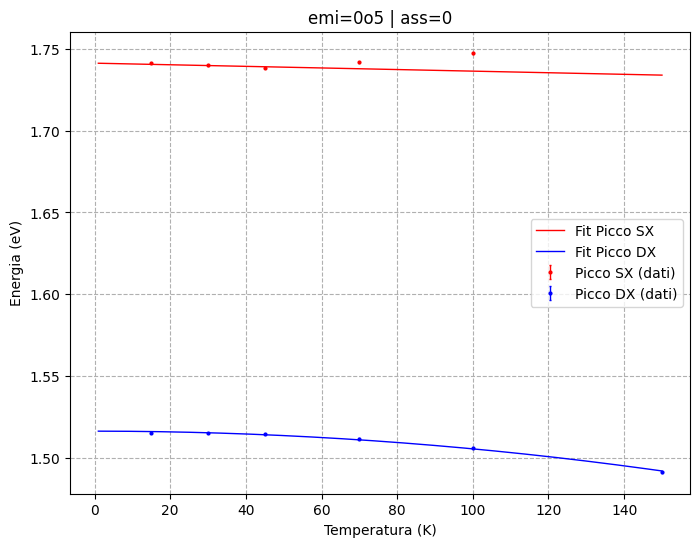

Parametri fit picco SX:
E_0 = 1.7411474756854115 ± 449.04368391667464 ; alpha = 4.869262145971646e-05 ± 2.2298594168989736e-06 ; beta = 8.159539694486358e-08 ± 9221178.69548194
• Chi quadro: 1504.392
• Gradi di libertà: 2
• Chi quadro ridotto: 752.196
• p-value: 0.000e+00
Parametri fit picco DX:
E_0 = 1.5163891783247614 ± 4.473464637369565e-05 ; alpha = 115.24665864129042 ± 0.8103592524082394 ; beta = 106649646.38546081 ± 8.756817593781759e-07
• Chi quadro: 192.987
• Gradi di libertà: 3
• Chi quadro ridotto: 64.329
• p-value: 0.000e+00


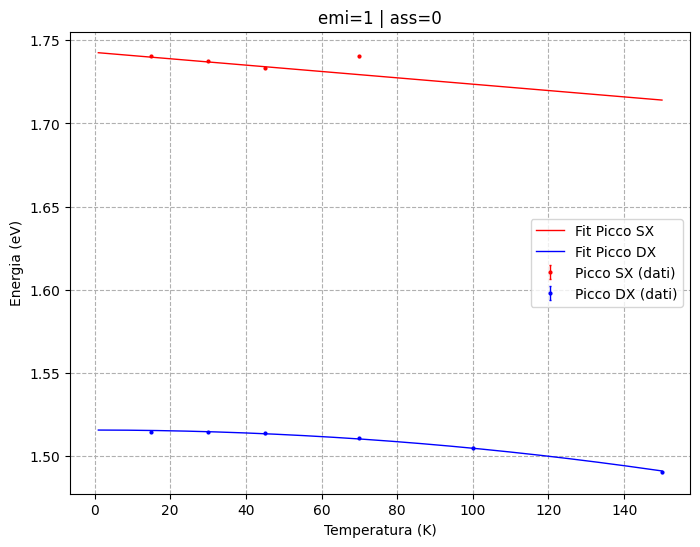

Parametri fit picco SX:
E_0 = 1.7427091026075936 ± 2.4587412270513482 ; alpha = 0.00019095382866688137 ± 6.088379864836616e-06 ; beta = 0.0008426329532626538 ± 12877.887289610886
• Chi quadro: 1365.574
• Gradi di libertà: 1
• Chi quadro ridotto: 1365.574
• p-value: 0.000e+00
Parametri fit picco DX:
E_0 = 1.5157832768539488 ± 3.890687029794615e-05 ; alpha = 211.78333571496933 ± 1.448685834373912 ; beta = 193826235.46065986 ± 1.5828980556603045e-06
• Chi quadro: 191.380
• Gradi di libertà: 3
• Chi quadro ridotto: 63.793
• p-value: 0.000e+00


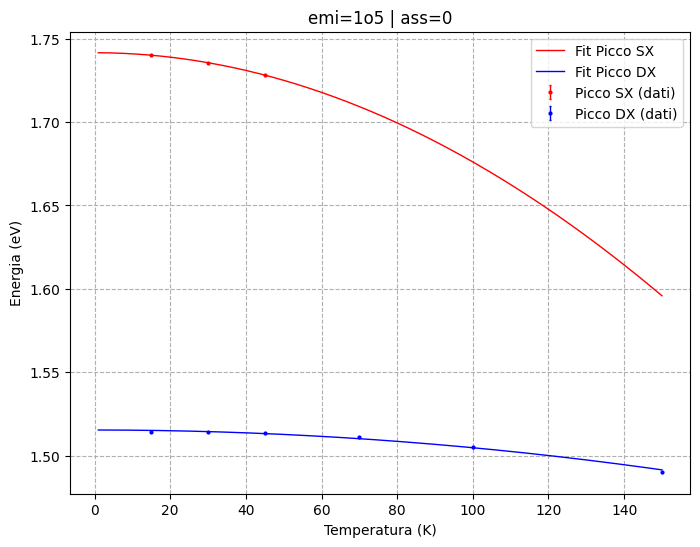

Parametri fit picco SX:
E_0 = 1.7414897349184901 ± 0.00020050664915379626 ; alpha = 0.029580710633574092 ± 0.2385182697921871 ; beta = 4419.950026728867 ± 36046.9643002685
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: nan
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5154210636529089 ± 3.7700412847702234e-05 ; alpha = 130.77238475997333 ± 1.1069147823139904 ; beta = 123177503.96586849 ± 1.1751644059604034e-06
• Chi quadro: 247.325
• Gradi di libertà: 3
• Chi quadro ridotto: 82.442
• p-value: 0.000e+00


/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_52606/3950946698.py:76: RuntimeWarning: invalid value encountered in scalar divide
  chi2_ridotto1 = chi2_1 / gdl1


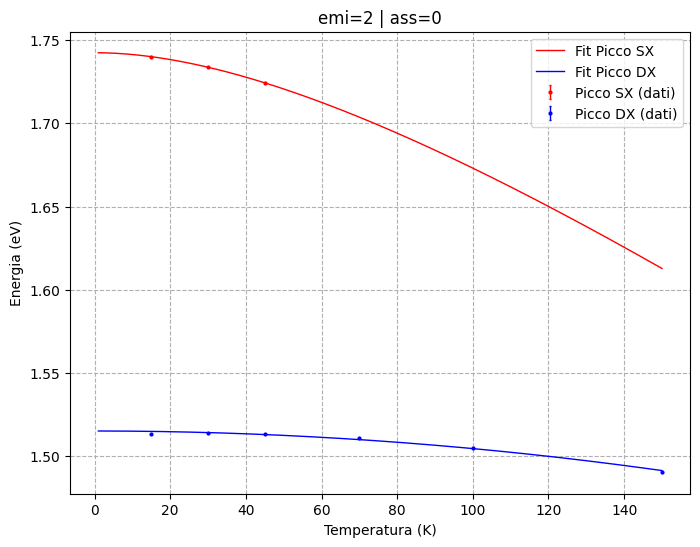

Parametri fit picco SX:
E_0 = 1.7423752036579079 ± 0.0002680901877129849 ; alpha = 0.0016999277843843712 ± 0.0006139355296945753 ; beta = 145.20040743043558 ± 68.54323050039159
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: inf
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5152038220089585 ± 4.054057564040282e-05 ; alpha = 76.22131792704042 ± 0.546513506403886 ; beta = 72161616.60591601 ± 5.772578836388643e-07
• Chi quadro: 393.111
• Gradi di libertà: 3
• Chi quadro ridotto: 131.037
• p-value: 0.000e+00


/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_52606/3950946698.py:76: RuntimeWarning: divide by zero encountered in scalar divide
  chi2_ridotto1 = chi2_1 / gdl1


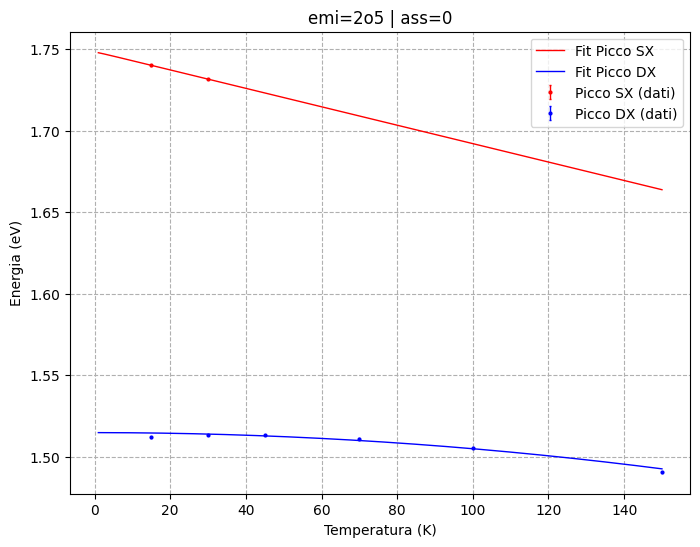

Parametri fit picco SX:
E_0 = 1.748008385554788 ± 0.0003056298535284761 ; alpha = 0.0005651391788437939 ± 1.379397738690647e-05 ; beta = 0.8389063744596109 ± 1.4678530711557124e-07
• Chi quadro: 0.000
• Gradi di libertà: -1
• Chi quadro ridotto: -0.000
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5147647490295024 ± 6.29077743207848e-05 ; alpha = 60.22381671303834 ± 0.7484516735879054 ; beta = 61005867.76696281 ± 7.388543906544998e-07
• Chi quadro: 384.537
• Gradi di libertà: 3
• Chi quadro ridotto: 128.179
• p-value: 0.000e+00


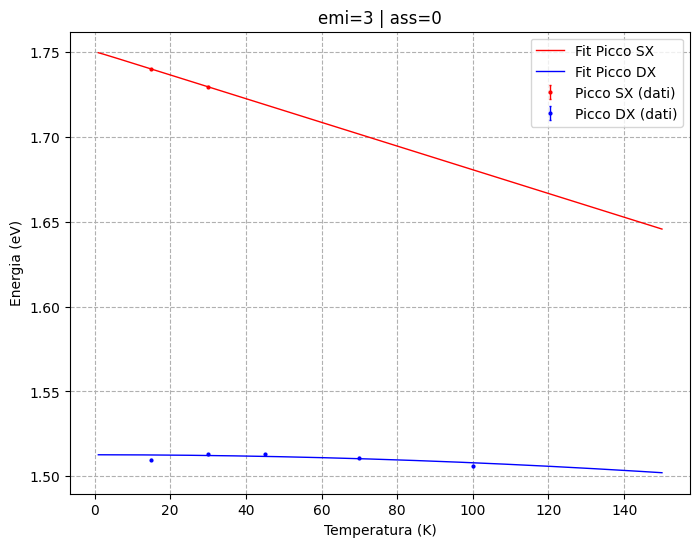

Parametri fit picco SX:
E_0 = 1.749867125810299 ± 0.0004732439227799999 ; alpha = 0.0006983044390751346 ± 2.6229928630409388e-05 ; beta = 0.7156461250755065 ± 2.8743885669027485e-07
• Chi quadro: 0.000
• Gradi di libertà: -1
• Chi quadro ridotto: -0.000
• p-value: nan
Parametri fit picco DX:
E_0 = 1.512694819079708 ± 0.00016461649580508018 ; alpha = 1.476343607094366 ± 16038.187330742916 ; beta = 3143373.34117182 ± 34149071380.45844
• Chi quadro: 310.640
• Gradi di libertà: 2
• Chi quadro ridotto: 155.320
• p-value: 0.000e+00


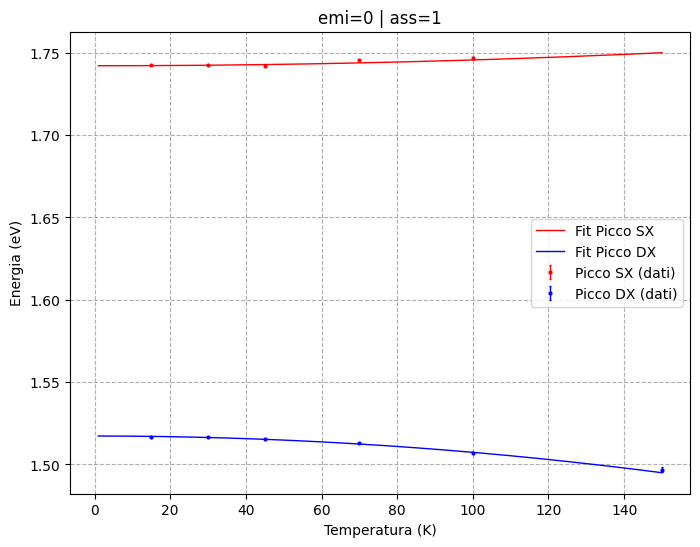

Parametri fit picco SX:
E_0 = 1.7421001254413595 ± 3.2624440425947074e-05 ; alpha = -3.525009164045898 ± 0.24815764618785058 ; beta = 10028751.26506135 ± 8.722284783482849e-08
• Chi quadro: 212.819
• Gradi di libertà: 2
• Chi quadro ridotto: 106.410
• p-value: 0.000e+00
Parametri fit picco DX:
E_0 = 1.5172922165398903 ± 0.00011065870023561993 ; alpha = 5.240103356981413 ± 18396.155168800557 ; beta = 5290022.876248189 ± 18571800694.657166
• Chi quadro: 48.094
• Gradi di libertà: 3
• Chi quadro ridotto: 16.031
• p-value: 2.034e-10


In [111]:
for ass in d_o_ass:
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        
        # picco sx
        y1 = data[ass][emi][0]
        err_y1 = data[ass][emi][1]
        
        # picco dx
        y2 = data[ass][emi][2]
        err_y2 = data[ass][emi][3]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
        y1 = [y_val for y_val in y1 if y_val != 0]
        err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0]
        
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
        y2 = [y_val for y_val in y2 if y_val != 0]
        err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]
        
        err_x = 1 # errore di 1 K sulla temperatura
        
        # Fit del primo picco - Parametri iniziali?
        popt1, pcov1 = curve_fit(varshni, x1, y1, sigma=err_y1, absolute_sigma=True, p0=[x1[0], 3, 1], 
                     bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
        
        # Fit del secondo picco
        popt2, pcov2 = curve_fit(varshni, x2, y2, sigma=err_y2, absolute_sigma=True, p0=[x2[0], 3, 1], 
                     bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
        
        # Errori sui parametri
        perr1 = np.sqrt(np.diag(pcov1))  # Errori per il primo picco
        perr2 = np.sqrt(np.diag(pcov2))  # Errori per il secondo picco

        
        # Creazione del grafico
        x_fit = np.linspace(1, 150, 500)  # Creazione di un intervallo continuo per il grafico

        plt.figure(figsize=(8, 6))
        
        # Plot del primo picco e del suo fit
        plt.errorbar(x1, y1, yerr=err_y1, fmt='ro', label='Picco SX (dati)', markersize=2, elinewidth=1, capsize=1)
        plt.plot(x_fit, varshni(x_fit, *popt1), 'r-', linewidth=1, label='Fit Picco SX')

        # Plot del secondo picco e del suo fit
        plt.errorbar(x2, y2, yerr=err_y2, fmt='bo', label='Picco DX (dati)', markersize=2, elinewidth=1, capsize=1)
        plt.plot(x_fit, varshni(x_fit, *popt2), 'b-', linewidth=1, label='Fit Picco DX')

        # Aggiungere etichette e legenda
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('Energia (eV)')
        plt.grid(linestyle='--')
        plt.legend()

        # Mostrare il grafico
        plt.show()
        
        # Analisi fit
        ## Residui del picco SX
        residui1 = y1 - varshni(x1, *popt1)
        chi2_1 = np.sum((residui1 / err_y1) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl1 = len(y1) - len(popt1)

        # Chi quadro ridotto
        chi2_ridotto1 = chi2_1 / gdl1
        
        # valore p
        p_value1 = 1 - chi2.cdf(chi2_1, gdl1)
        
        ## Residui del picco DX
        residui2 = y2 - varshni(x2, *popt2)
        chi2_2 = np.sum((residui2 / err_y2) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl2 = len(y2) - len(popt2)

        # Chi quadro ridotto
        chi2_ridotto2 = chi2_2 / gdl2
        
        # valore p
        p_value2 = 1 - chi2.cdf(chi2_2, gdl2)
        
        # Stampa dei risultati
        print("Parametri fit picco SX:")
        print("E_0 =", popt1[0], '±', perr1[0], "; alpha =", popt1[1], '±', perr1[1], "; beta =", popt1[2], '±', perr1[2])
        print(f"• Chi quadro: {chi2_1:.3f}")
        print(f"• Gradi di libertà: {gdl1}")
        print(f"• Chi quadro ridotto: {chi2_ridotto1:.3f}")
        print(f"• p-value: {p_value1:.3e}")       
        print("Parametri fit picco DX:")
        print("E_0 =", popt2[0], '±', perr2[0], "; alpha =", popt2[1], '±', perr2[1], "; beta =", popt2[2], '±', perr2[2])
        print(f"• Chi quadro: {chi2_2:.3f}")
        print(f"• Gradi di libertà: {gdl2}")
        print(f"• Chi quadro ridotto: {chi2_ridotto2:.3f}")
        print(f"• p-value: {p_value2:.3e}")  
        
        arr_e_0_sx.append(popt1[0])
        arr_e_0_dx.append(popt2[0])
        arr_err_e_0_sx.append(perr1[0])
        arr_err_e_0_dx.append(perr2[0])

### Stampa E_0

In [112]:
np.set_printoptions(legacy='1.25')

#### E_0 ricavati da Picco SX

In [113]:
arr_e_0_sx

[1.7411474756854115,
 1.7427091026075936,
 1.7414897349184901,
 1.7423752036579079,
 1.748008385554788,
 1.749867125810299,
 1.7421001254413595]

#### Errori E_0 SX

In [114]:
arr_err_e_0_sx

[449.04368391667464,
 2.4587412270513482,
 0.00020050664915379626,
 0.0002680901877129849,
 0.0003056298535284761,
 0.0004732439227799999,
 3.2624440425947074e-05]

#### E_0 ricavati da Picco DX

In [115]:
arr_e_0_dx

[1.5163891783247614,
 1.5157832768539488,
 1.5154210636529089,
 1.5152038220089585,
 1.5147647490295024,
 1.512694819079708,
 1.5172922165398903]

#### Errori E_0 DX

In [116]:
arr_err_e_0_dx

[4.473464637369565e-05,
 3.890687029794615e-05,
 3.7700412847702234e-05,
 4.054057564040282e-05,
 6.29077743207848e-05,
 0.00016461649580508018,
 0.00011065870023561993]